In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path="C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/TFM/"
df=pd.read_csv(path+"datos_procesados_4.csv")

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Filtramos el Dataframe con los precios menores a 800,000 euros'

df = df[df['price'] <= 800000]

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status', 'newDevelopment', 'hasLift', 'priceByArea',
       'newDevelopmentFinished', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status','district','neighborhood']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea','floor', 'size', 'rooms', 'bathrooms','distance','latitude','longitude', 
                    'newDevelopment', 'hasLift', 'newDevelopmentFinished','hasParkingSpace',
                    'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root_Mean Squared Error:", root_mse)

Mean Squared Error: 3985966724.46417
Root_Mean Squared Error: 63134.51294232157


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Filtramos el Dataframe con los precios menores a 800,000 euros
df = df[df['price'] <= 800000]

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status', 'newDevelopment', 'hasLift', 'priceByArea',
       'newDevelopmentFinished', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status','district','neighborhood']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea','floor', 'size', 'rooms', 'bathrooms','distance','latitude','longitude', 
                    'newDevelopment', 'hasLift', 'newDevelopmentFinished','hasParkingSpace',
                    'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", root_mse)


Mean Squared Error: 267399098.06332305
Root Mean Squared Error: 16352.342280643561


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

# Filtramos el DataFrame con los precios menores a 800,000 euros
df = df[df['price'] <= 800000]

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status', 'newDevelopment', 'hasLift', 'priceByArea',
       'newDevelopmentFinished', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas y numéricas
categorical_features = ['propertyType', 'status', 'district', 'neighborhood']
categorical_transformer = TargetEncoder()

numeric_features = ['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'newDevelopment', 'hasLift', 'newDevelopmentFinished', 'hasParkingSpace',
                    'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']
numeric_transformer = StandardScaler()

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Define la distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'regressor__n_estimators': randint(600, 800),
    'regressor__learning_rate': uniform(0.05, 0.15),
    'regressor__max_depth': randint(3, 6)
}

# Aplica la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

# Obtiene el mejor modelo
best_model = random_search.best_estimator_

# Evalúa el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 89431144.06821877
Root Mean Squared Error: 9456.804114933268
Mean Absolute Error: 6512.308863170375


In [17]:
df= df[df['price'] <= 800000]
print(f"Total de datos filtrados menores a 800,000: {df['price'].count()}")
print(f"rmse // mean: {rmse/df['price'].mean()}")

Total de datos filtrados menores a 800,000: 7324
rmse // mean: 0.025902239687059757


In [18]:
# Obtiene los hiperparámetros del modelo GradientBoostingRegressor
params_regressor = best_model.named_steps['regressor'].get_params()
print("Hiperparámetros del modelo GradientBoostingRegressor:")
print(params_regressor)

Hiperparámetros del modelo GradientBoostingRegressor:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.15361388464778983, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 709, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


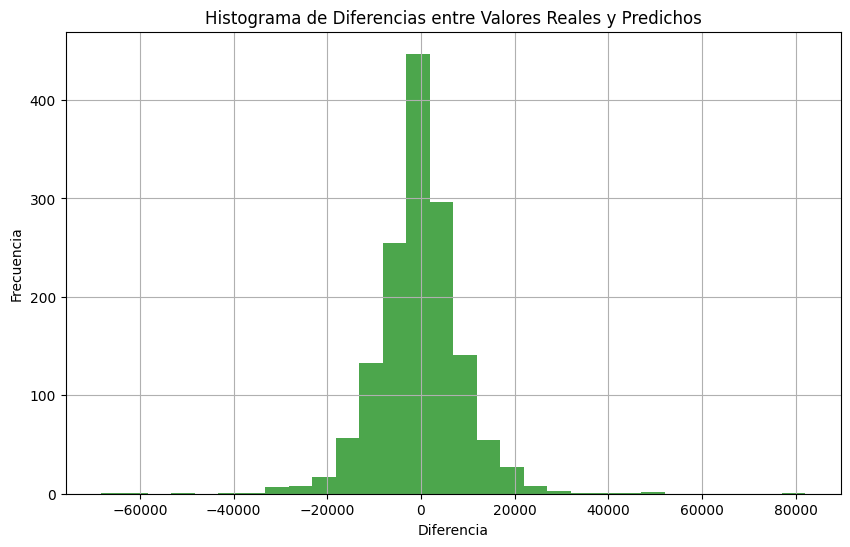

In [19]:
import matplotlib.pyplot as plt

# Calcular las diferencias entre los valores reales y predichos
differences = y_test - y_pred

# Graficar el histograma de las diferencias
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=30, color='green', alpha=0.7)
plt.title('Histograma de Diferencias entre Valores Reales y Predichos')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

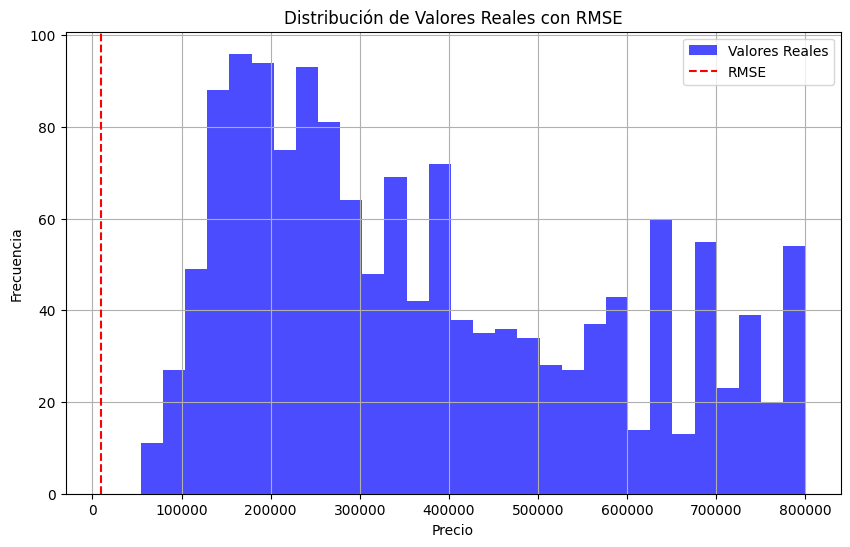

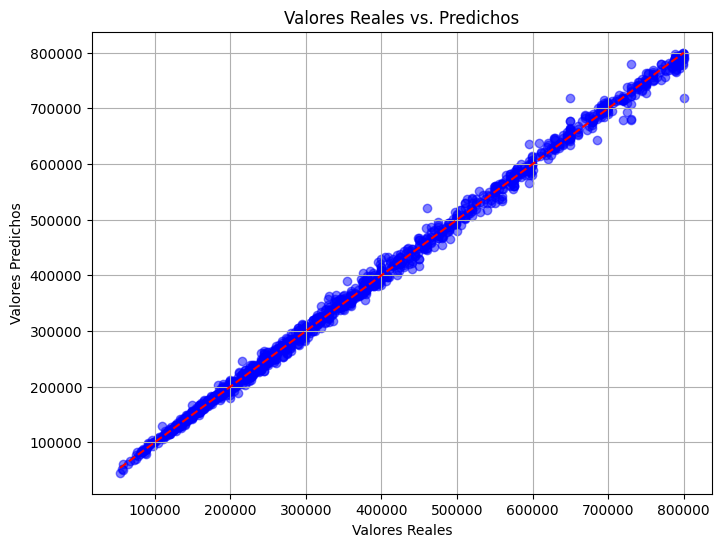

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que y_test contiene los valores reales y y_pred contiene los valores predichos
# También asumiendo que RMSE ya está calculado y almacenado en una variable llamada 'rmse'

# Comparar el RMSE con la distribución de la variable Y ('price')
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, color='blue', alpha=0.7, label='Valores Reales')
plt.axvline(x=rmse, color='red', linestyle='--', label='RMSE')
plt.title('Distribución de Valores Reales con RMSE')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la relación entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()




In [21]:
import pandas as pd

# Supongamos que tienes tu DataFrame llamado df

# Definimos los límites de los tramos
max_price = int(df['price'].max())
bins = range(0, max_price + 50000, 50000)

# Etiquetamos los tramos
labels = [f'{i}-{i+49999}' for i in bins[:-1]]

# Creamos una nueva columna en el DataFrame que contendrá los tramos
df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Mostramos los primeros registros del DataFrame con la nueva columna de bucketing
print(df[['price', 'price_bucket']].head())


      price   price_bucket
1   91000.0    50000-99999
2  279000.0  250000-299999
3  350000.0  350000-399999
4   70700.0    50000-99999
5  249000.0  200000-249999


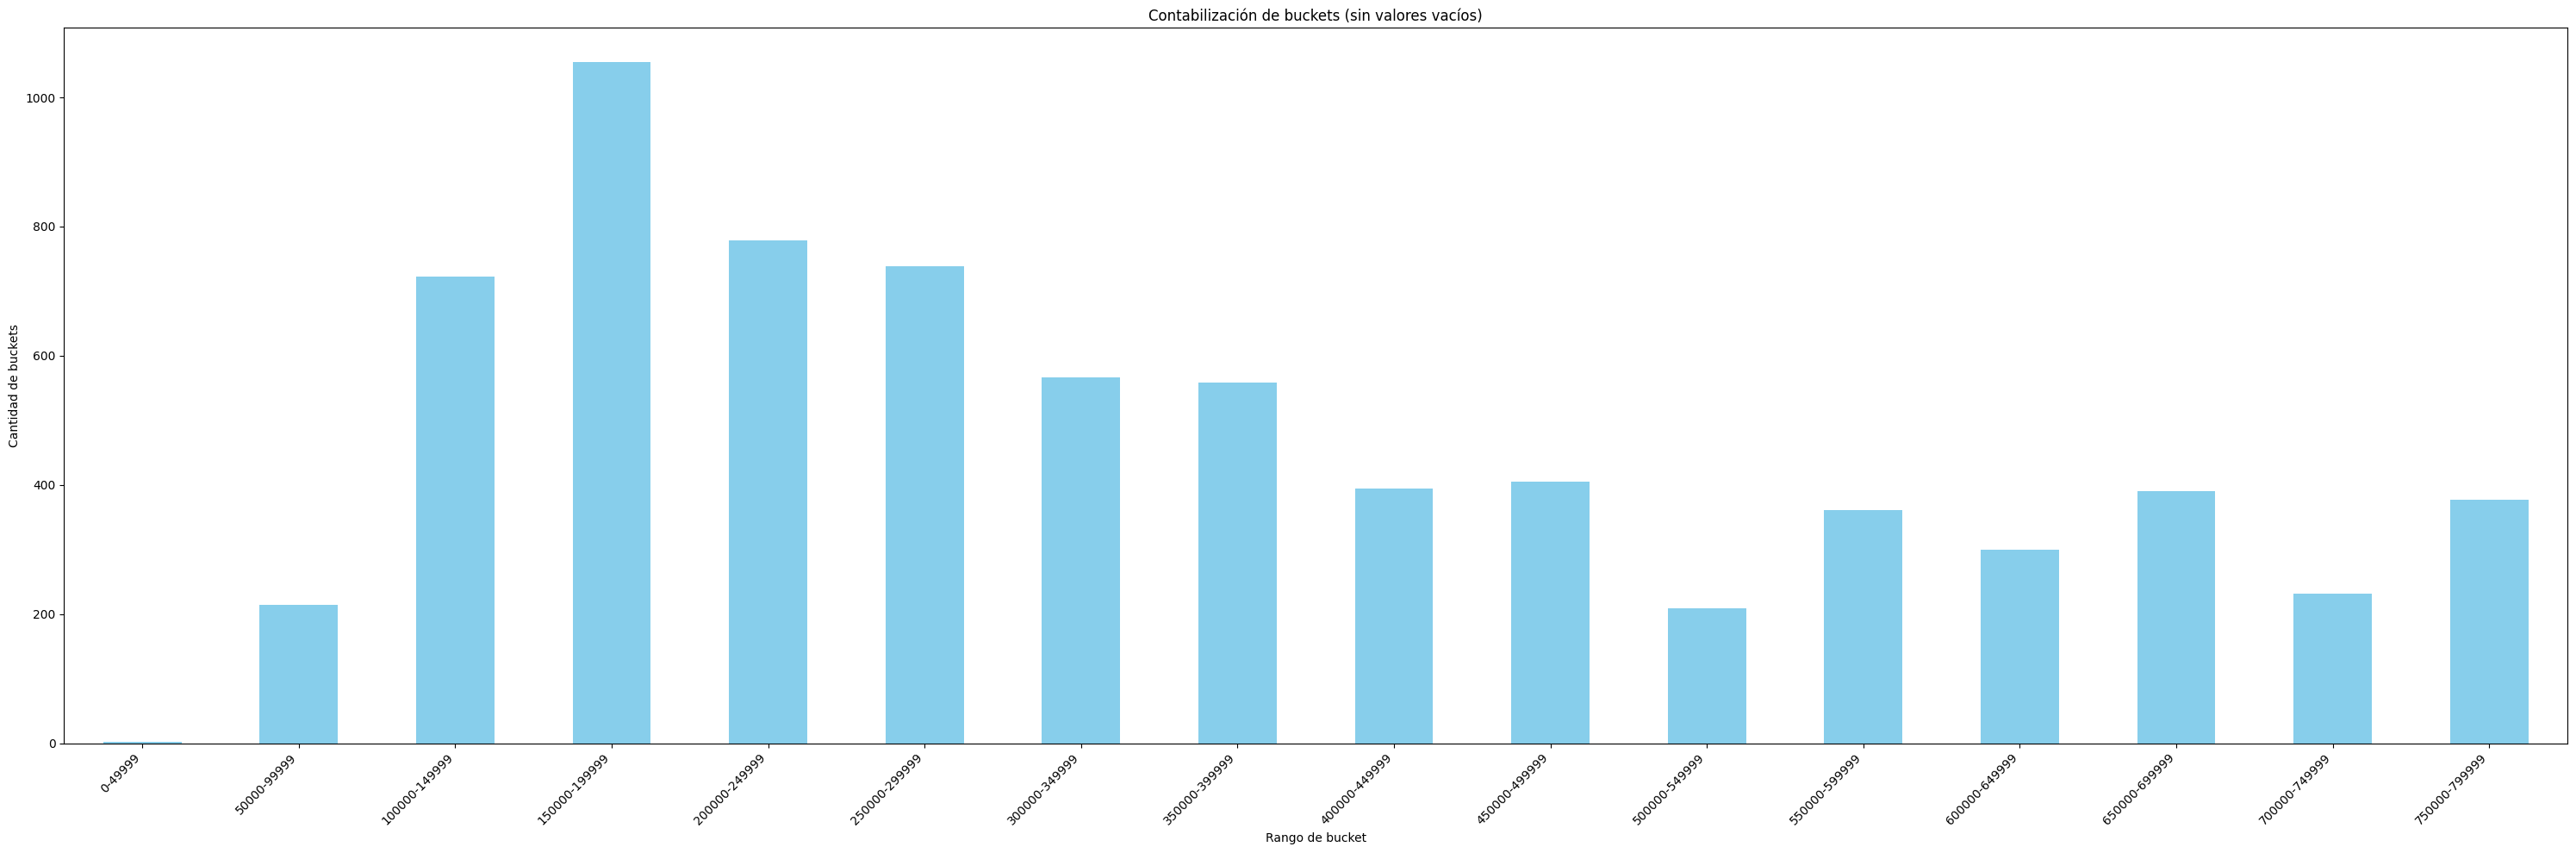

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df con la columna 'price_bucket' creada

# Agrupamos por 'price_bucket' y contamos las observaciones en cada grupo
grouped_data = df.groupby('price_bucket', observed=False)['price'].count()
# Filtramos los buckets que tienen valores no nulos
grouped_data = grouped_data[grouped_data != 0]

# Creamos el gráfico de barras
plt.figure(figsize=(30, 10))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Contabilización de buckets (sin valores vacíos)')
plt.xlabel('Rango de bucket')
plt.ylabel('Cantidad de buckets')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [23]:
display(grouped_data)

price_bucket
0-49999             2
50000-99999       214
100000-149999     723
150000-199999    1055
200000-249999     778
250000-299999     739
300000-349999     566
350000-399999     558
400000-449999     394
450000-499999     405
500000-549999     209
550000-599999     361
600000-649999     299
650000-699999     390
700000-749999     232
750000-799999     377
Name: price, dtype: int64

In [24]:
# Evaluar el modelo en el conjunto de entrenamiento
y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Calcular métricas de evaluación en el conjunto de entrenamiento
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Training Set Metrics:")
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)

# Comparar métricas de entrenamiento y prueba
print("\nComparison with Test Set:")
print("Training MSE vs Test MSE:", mse_train - mse)
print("Training RMSE vs Test RMSE:", rmse_train - rmse)
print("Training MAE vs Test MAE:", mae_train - mae)


Training Set Metrics:
Mean Squared Error: 29487056.376713853
Root Mean Squared Error: 5430.198557761388
Mean Absolute Error: 3996.2171656527507

Comparison with Test Set:
Training MSE vs Test MSE: -59944087.69150491
Training RMSE vs Test RMSE: -4026.60555717188
Training MAE vs Test MAE: -2516.091697517624


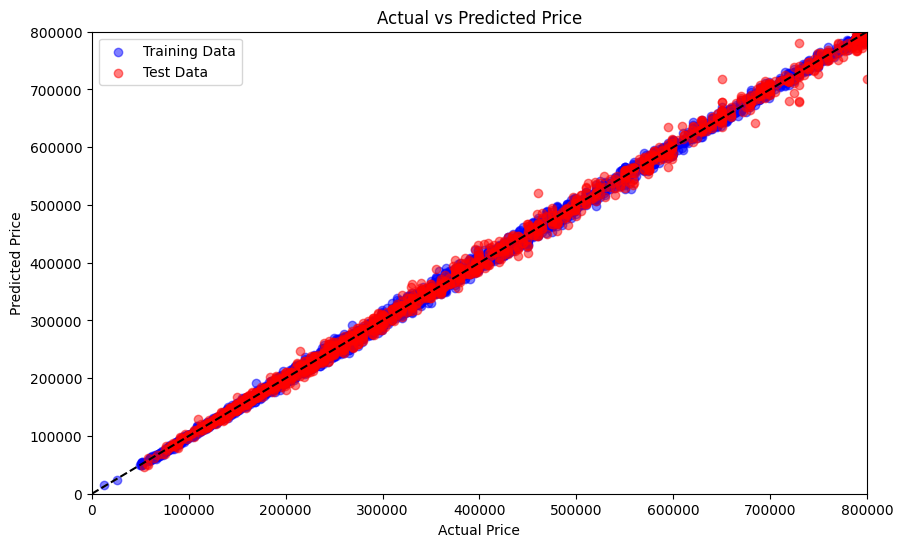

In [25]:
import matplotlib.pyplot as plt

# Predicciones del conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Predicciones del conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Graficar las predicciones del conjunto de entrenamiento y conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Test Data', color='red', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend(loc='upper left')
plt.plot([0, 800000], [0, 800000], color='black', linestyle='--') # Línea de referencia de la igualdad
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.show()
